In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
df=pd.read_csv("Stock.csv")
df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [12]:
df.shape

(1258, 15)

In [13]:
df=df.drop(["Unnamed: 0","symbol"],axis=1)

In [15]:
df.tail()

,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,2020-05-18 00:00:00+00:00,314.96,316.50,310.3241,313.17,33843125,314.96,316.50,310.3241,313.17,33843125,0.0,1.0
1254,2020-05-19 00:00:00+00:00,313.14,318.52,313.0100,315.03,25432385,313.14,318.52,313.0100,315.03,25432385,0.0,1.0
1255,2020-05-20 00:00:00+00:00,319.23,319.52,316.2000,316.68,27876215,319.23,319.52,316.2000,316.68,27876215,0.0,1.0
1256,2020-05-21 00:00:00+00:00,316.85,320.89,315.8700,318.66,25672211,316.85,320.89,315.8700,318.66,25672211,0.0,1.0
1257,2020-05-22 00:00:00+00:00,318.89,319.23,315.3500,315.77,20450754,318.89,319.23,315.3500,315.77,20450754,0.0,1.0


In [16]:
df1=df.reset_index()["close"]

In [17]:
df1.shape

(1258,)

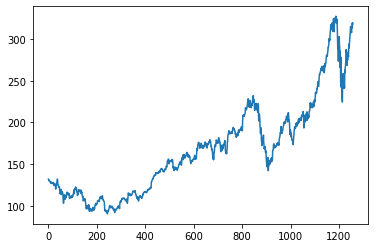

In [18]:
import matplotlib.pyplot as plt
plt.plot(df1)

## Data Preprocessing

In [19]:
#LSTM are sensitive to the scaled data, so we apply MinMax scaler
from sklearn.preprocessing import MinMaxScaler
#feature range is set as (0,1) because we want values between 0 and 1
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [20]:
df1.shape

(1258, 1)

In [30]:
#splitting dataset into train and test (we take continuous values (consecutive not random) in time series)
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [31]:
training_size,test_size

(817, 441)

In [32]:
train_data

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       [0.1696994 ],
       [0.16727181],
       [0.16794731],
       [0.16473866],
       [0.16174111],
       [0.1581525 ],
       [0.15654817],
       [0.16271215],
       [0.1614878 ],
       [0.1554927 ],
       [0.15443722],
       [0.15730811],
       [0.15604154],
       [0.15849025],
       [0.15308621],
       [0.15735033],
       [0.15490163],
       [0.15946129],
       [0.15688592],
       [0.1537195 ],
       [0.14434687],
       [0.14812547],
       [0.15308621],
       [0.15241071],
       [0.15055307],
       [0.14924428],
       [0.13607194],
       [0.12551718],
       [0.13906949],
       [0.14911762],
       [0.14890653],
       [0.15401503],
       [0.16115005],
       [0.16583636],
       [0.17618002],
       [0.17060711],
       [0.14725998],
       [0.14700667],
       [0.14422021],
       [0.13691632],
       [0.13949168],
       [0.13784514],
       [0.13522756],
       [0.13071012],
       [0.118

In [33]:
test_data

array([[0.52651355],
       [0.52837119],
       [0.53119986],
       [0.53871485],
       [0.5461454 ],
       [0.55999324],
       [0.56864815],
       [0.57962509],
       [0.58270708],
       [0.57641645],
       [0.56049987],
       [0.55290045],
       [0.54036139],
       [0.5636663 ],
       [0.55192941],
       [0.57447437],
       [0.56362408],
       [0.53846154],
       [0.53998142],
       [0.54053027],
       [0.54753863],
       [0.53753272],
       [0.55074728],
       [0.55665794],
       [0.54918517],
       [0.56831039],
       [0.5716457 ],
       [0.57806299],
       [0.58659124],
       [0.59837035],
       [0.58114498],
       [0.56552394],
       [0.56332855],
       [0.57641645],
       [0.53204425],
       [0.52398041],
       [0.55632019],
       [0.53626615],
       [0.55648907],
       [0.55243604],
       [0.5306088 ],
       [0.54449886],
       [0.55015621],
       [0.55893777],
       [0.52668243],
       [0.54656759],
       [0.53179093],
       [0.514

In [34]:
def create_dataset(dataset,time_step=1):
    #Convert an array of values into a dataset matrix
    dataX,dataY=[],[]
    for i in range(len(dataset)-time_step-1):   
        a=dataset[i:(i+time_step),0]   #i=0 then values will be from i to n-1 will be in x and n will be in y
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX) , np.array(dataY)

In [35]:
#reshape into X=t,t+1,t+2,t+3 and y=t+4
time_step=100
X_train,y_train = create_dataset(train_data,time_step)
X_test,y_test = create_dataset(test_data,time_step)

In [39]:
X_train

array([[0.17607447, 0.17495567, 0.16862282, ..., 0.09055982, 0.08388922,
        0.09085536],
       [0.17495567, 0.16862282, 0.1696994 , ..., 0.08388922, 0.09085536,
        0.0873934 ],
       [0.16862282, 0.1696994 , 0.16727181, ..., 0.09085536, 0.0873934 ,
        0.09030651],
       ...,
       [0.34801148, 0.32930845, 0.32145571, ..., 0.50042219, 0.50413747,
        0.5062062 ],
       [0.32930845, 0.32145571, 0.32694419, ..., 0.50413747, 0.5062062 ,
        0.51920966],
       [0.32145571, 0.32694419, 0.32230009, ..., 0.5062062 , 0.51920966,
        0.53719497]])

In [37]:
X_train.shape , y_train.shape

((716, 100), (716,))

In [38]:
X_test.shape , y_test.shape

((340, 100), (340,))

In [41]:
X_train.shape[1]

100

In [43]:
#reshape the input to be [samples , time_step , features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0] , X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0] , X_test.shape[1] , 1)

In [45]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import LSTM , Dense

In [57]:
#It is a stack LSTM model which means one LSTM after another
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))  #input shape must be (X_train.shape[1],1)
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss="mean_squared_error" , optimizer="adam")

In [58]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_10 (LSTM)               (None, 100, 50)           20200     
_________________________________________________________________
lstm_11 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [59]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 8s 281ms/step - loss: 0.0224 - val_loss: 0.0682
Epoch 2/100
12/12 [==============================] - 2s 171ms/step - loss: 0.0045 - val_loss: 0.0047
Epoch 3/100
12/12 [==============================] - 2s 184ms/step - loss: 0.0012 - val_loss: 0.0038
Epoch 4/100
12/12 [==============================] - 3s 227ms/step - loss: 8.0129e-04 - val_loss: 0.0044
Epoch 5/100
12/12 [==============================] - 3s 222ms/step - loss: 6.3204e-04 - val_loss: 0.0047
Epoch 6/100
12/12 [==============================] - 2s 178ms/step - loss: 5.9741e-04 - val_loss: 0.0046
Epoch 7/100
12/12 [==============================] - 2s 177ms/step - loss: 6.0858e-04 - val_loss: 0.0041
Epoch 8/100
12/12 [==============================] - 2s 169ms/step - loss: 5.5798e-04 - val_loss: 0.0040
Epoch 9/100
12/12 [==============================] - 2s 168ms/step - loss: 5.8508e-04 - val_loss: 0.0041
Epoch 10/100
12/12 [==============================] - 2s 172ms/step

12/12 [==============================] - 2s 206ms/step - loss: 2.5229e-04 - val_loss: 9.8220e-04
Epoch 79/100
12/12 [==============================] - 2s 188ms/step - loss: 1.9433e-04 - val_loss: 9.8305e-04
Epoch 80/100
12/12 [==============================] - 2s 179ms/step - loss: 1.9364e-04 - val_loss: 0.0010
Epoch 81/100
12/12 [==============================] - 2s 188ms/step - loss: 1.7806e-04 - val_loss: 9.2590e-04
Epoch 82/100
12/12 [==============================] - 2s 200ms/step - loss: 1.7840e-04 - val_loss: 0.0015
Epoch 83/100
12/12 [==============================] - 2s 195ms/step - loss: 1.9997e-04 - val_loss: 8.3590e-04
Epoch 84/100
12/12 [==============================] - 2s 192ms/step - loss: 1.5887e-04 - val_loss: 0.0012
Epoch 85/100
12/12 [==============================] - 2s 194ms/step - loss: 1.8493e-04 - val_loss: 0.0011
Epoch 86/100
12/12 [==============================] - 2s 189ms/step - loss: 1.6759e-04 - val_loss: 0.0011
Epoch 87/100
12/12 [=======================

In [60]:
#Doing prediction and checking performance matrix
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [61]:
#Inverse transforming the values back to original
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [62]:
#Calculating RMS performance matrix
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

141.6796809895472

In [64]:
#RMS for test data
math.sqrt(mean_squared_error(y_test,test_predict))

240.26992790814103

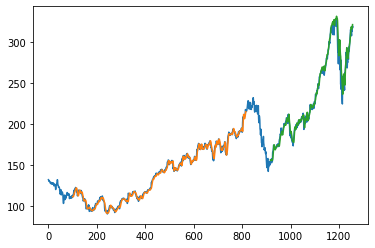

In [67]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

here "blue" colored line shows the whole dataset , "yellow" colored line shows the training set and "green" colored line shows the testing dataset.

##### Predict the next 30 days output

In [69]:
len(test_data)

441

In [72]:
#because if we predict the output for next 30 days we will use the previous 100 days values for prediction so from 341 to 441 we have the data of previous 100 days
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [73]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [74]:
temp_input

[0.8583551465000423,
 0.8866418981676942,
 0.8743139407244789,
 0.8843198513890065,
 0.8783669678290975,
 0.8986321033521913,
 0.925821160179009,
 0.9287764924427933,
 0.9567677108840666,
 0.9386979650426415,
 0.933040614709111,
 0.9495060373216249,
 0.9642404796082076,
 0.9551211686228154,
 0.9598919192772104,
 0.9663514312251966,
 0.9624672802499368,
 0.9229502659799038,
 0.9598497002448705,
 0.9879253567508233,
 0.985941062230854,
 0.9253145317909315,
 0.9217259140420504,
 0.964747107996285,
 0.9757240564046274,
 0.9915984125643842,
 0.9697289538123788,
 0.9761462467280253,
 0.9679557544541082,
 1.0000000000000002,
 0.9901629654648318,
 0.9905007177235499,
 0.9653803934813816,
 0.9848855864223593,
 0.9708688676855528,
 0.9402600692392133,
 0.8774803681499621,
 0.8348391454867856,
 0.8541332432660644,
 0.7733682344000676,
 0.7726927298826314,
 0.8801401671873683,
 0.8400743054969182,
 0.8967322468969012,
 0.8552731571392387,
 0.8388499535590646,
 0.7423372456303303,
 0.82327113062568

In [75]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        #shifting one postion ahead
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        #first cycle will start from here 
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.9869739]
101
1 day input [0.8866419  0.87431394 0.88431985 0.87836697 0.8986321  0.92582116
 0.92877649 0.95676771 0.93869797 0.93304061 0.94950604 0.96424048
 0.95512117 0.95989192 0.96635143 0.96246728 0.92295027 0.9598497
 0.98792536 0.98594106 0.92531453 0.92172591 0.96474711 0.97572406
 0.99159841 0.96972895 0.97614625 0.96795575 1.         0.99016297
 0.99050072 0.96538039 0.98488559 0.97086887 0.94026007 0.87748037
 0.83483915 0.85413324 0.77336823 0.77269273 0.88014017 0.84007431
 0.89673225 0.85527316 0.83884995 0.74233725 0.82327113 0.78143207
 0.6665963  0.7921557  0.64118044 0.68614371 0.66001013 0.65203074
 0.58642236 0.56586169 0.66089673 0.65515494 0.70970193 0.66452757
 0.69437642 0.69218104 0.63569197 0.65266402 0.63780292 0.7267162
 0.71388162 0.74191506 0.75002111 0.77222832 0.83049059 0.8194292
 0.8289707  0.8125475  0.78776492 0.75162543 0.78426074 0.77974331
 0.81326522 0.8141096  0.79473106 0.83336148 0.85898843 0.83901883
 0.85628641 0.87486279 0.88782403 0.9

9 day output [[1.094063]]
10 day input [0.93304061 0.94950604 0.96424048 0.95512117 0.95989192 0.96635143
 0.96246728 0.92295027 0.9598497  0.98792536 0.98594106 0.92531453
 0.92172591 0.96474711 0.97572406 0.99159841 0.96972895 0.97614625
 0.96795575 1.         0.99016297 0.99050072 0.96538039 0.98488559
 0.97086887 0.94026007 0.87748037 0.83483915 0.85413324 0.77336823
 0.77269273 0.88014017 0.84007431 0.89673225 0.85527316 0.83884995
 0.74233725 0.82327113 0.78143207 0.6665963  0.7921557  0.64118044
 0.68614371 0.66001013 0.65203074 0.58642236 0.56586169 0.66089673
 0.65515494 0.70970193 0.66452757 0.69437642 0.69218104 0.63569197
 0.65266402 0.63780292 0.7267162  0.71388162 0.74191506 0.75002111
 0.77222832 0.83049059 0.8194292  0.8289707  0.8125475  0.78776492
 0.75162543 0.78426074 0.77974331 0.81326522 0.8141096  0.79473106
 0.83336148 0.85898843 0.83901883 0.85628641 0.87486279 0.88782403
 0.90095415 0.92793211 0.948535   0.93333615 0.91746179 0.92544119
 0.91771511 0.9483239  

19 day output [[1.2122253]]
20 day input [0.98594106 0.92531453 0.92172591 0.96474711 0.97572406 0.99159841
 0.96972895 0.97614625 0.96795575 1.         0.99016297 0.99050072
 0.96538039 0.98488559 0.97086887 0.94026007 0.87748037 0.83483915
 0.85413324 0.77336823 0.77269273 0.88014017 0.84007431 0.89673225
 0.85527316 0.83884995 0.74233725 0.82327113 0.78143207 0.6665963
 0.7921557  0.64118044 0.68614371 0.66001013 0.65203074 0.58642236
 0.56586169 0.66089673 0.65515494 0.70970193 0.66452757 0.69437642
 0.69218104 0.63569197 0.65266402 0.63780292 0.7267162  0.71388162
 0.74191506 0.75002111 0.77222832 0.83049059 0.8194292  0.8289707
 0.8125475  0.78776492 0.75162543 0.78426074 0.77974331 0.81326522
 0.8141096  0.79473106 0.83336148 0.85898843 0.83901883 0.85628641
 0.87486279 0.88782403 0.90095415 0.92793211 0.948535   0.93333615
 0.91746179 0.92544119 0.91771511 0.9483239  0.94064004 0.96635143
 0.9563033  0.96491598 0.98697388 0.9963342  1.008044   1.02031839
 1.03260159 1.0448631  

27 day output [[1.2945572]]
28 day input [0.96795575 1.         0.99016297 0.99050072 0.96538039 0.98488559
 0.97086887 0.94026007 0.87748037 0.83483915 0.85413324 0.77336823
 0.77269273 0.88014017 0.84007431 0.89673225 0.85527316 0.83884995
 0.74233725 0.82327113 0.78143207 0.6665963  0.7921557  0.64118044
 0.68614371 0.66001013 0.65203074 0.58642236 0.56586169 0.66089673
 0.65515494 0.70970193 0.66452757 0.69437642 0.69218104 0.63569197
 0.65266402 0.63780292 0.7267162  0.71388162 0.74191506 0.75002111
 0.77222832 0.83049059 0.8194292  0.8289707  0.8125475  0.78776492
 0.75162543 0.78426074 0.77974331 0.81326522 0.8141096  0.79473106
 0.83336148 0.85898843 0.83901883 0.85628641 0.87486279 0.88782403
 0.90095415 0.92793211 0.948535   0.93333615 0.91746179 0.92544119
 0.91771511 0.9483239  0.94064004 0.96635143 0.9563033  0.96491598
 0.98697388 0.9963342  1.008044   1.02031839 1.03260159 1.0448631
 1.05714035 1.06944215 1.081756   1.09406304 1.10634148 1.11857021
 1.13072515 1.14278674

In [76]:
#taking the previous 100 outputs
day_new=np.arange(1,101)
#taking the next 30 values as per predictions
day_pred=np.arange(101,131)

In [77]:
len(df1)

1258

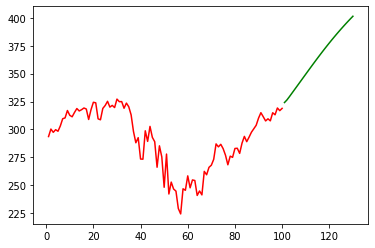

In [81]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]) , color="red")
plt.plot(day_pred,scaler.inverse_transform(lst_output) , color="green")

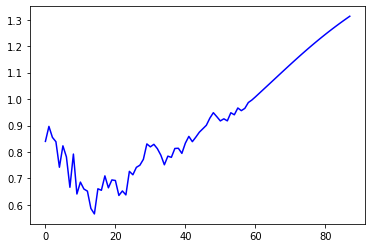

In [83]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:] , color="blue")

In [84]:
df3=scaler.inverse_transform(df3).tolist()

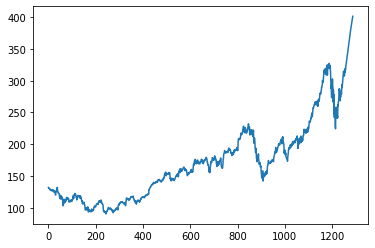

In [85]:
plt.plot(df3)